# タイムステップの考え方

0,1,2,3,4,…99のデータをタイムステップ5のデータにする。

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 1. ダミーの時系列データを作成 -------------------------------------
# 例：0, 1, 2, ... , 99 の合計 100 個の値
time_series_length = 100
time_series = np.arange(time_series_length)  # [0, 1, 2, ..., 99]

# 2. タイムステップ数の設定 -----------------------------------------
timesteps = 5  # 過去5時点の情報を使う

# 3. 学習用データ (X, y) を作成 --------------------------------------
X = []
y = []

# time_series[i : i+timesteps] -> 入力 (過去5時点)
# time_series[i+timesteps]     -> 目的値（次の1点）
for i in range(time_series_length - timesteps):
    X.append(time_series[i : i+timesteps])
    y.append(time_series[i + timesteps])

X = np.array(X)  # shape: (95, 5)
y = np.array(y)  # shape: (95,)

print(X)
print(y)
print("X.shape =", X.shape)  # (サンプル数, タイムステップ数)
print("y.shape =", y.shape)



[[ 0  1  2  3  4]
 [ 1  2  3  4  5]
 [ 2  3  4  5  6]
 [ 3  4  5  6  7]
 [ 4  5  6  7  8]
 [ 5  6  7  8  9]
 [ 6  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 12]
 [ 9 10 11 12 13]
 [10 11 12 13 14]
 [11 12 13 14 15]
 [12 13 14 15 16]
 [13 14 15 16 17]
 [14 15 16 17 18]
 [15 16 17 18 19]
 [16 17 18 19 20]
 [17 18 19 20 21]
 [18 19 20 21 22]
 [19 20 21 22 23]
 [20 21 22 23 24]
 [21 22 23 24 25]
 [22 23 24 25 26]
 [23 24 25 26 27]
 [24 25 26 27 28]
 [25 26 27 28 29]
 [26 27 28 29 30]
 [27 28 29 30 31]
 [28 29 30 31 32]
 [29 30 31 32 33]
 [30 31 32 33 34]
 [31 32 33 34 35]
 [32 33 34 35 36]
 [33 34 35 36 37]
 [34 35 36 37 38]
 [35 36 37 38 39]
 [36 37 38 39 40]
 [37 38 39 40 41]
 [38 39 40 41 42]
 [39 40 41 42 43]
 [40 41 42 43 44]
 [41 42 43 44 45]
 [42 43 44 45 46]
 [43 44 45 46 47]
 [44 45 46 47 48]
 [45 46 47 48 49]
 [46 47 48 49 50]
 [47 48 49 50 51]
 [48 49 50 51 52]
 [49 50 51 52 53]
 [50 51 52 53 54]
 [51 52 53 54 55]
 [52 53 54 55 56]
 [53 54 55 56 57]
 [54 55 56 57 58]
 [55 56 57

In [ ]:
# 4. RNN に入力する形状に変換 (features=1) ---------------------------
# RNN レイヤーは (batch_size, timesteps, features) という3次元入力を想定している
X = np.expand_dims(X, axis=-1)  # shape: (95, 5, 1)

print("X.shape (expanded) =", X.shape)  # (95, 5, 1)

# 5. シンプルな RNN モデルの構築 ------------------------------------
model = Sequential()
model.add(SimpleRNN(units=10, input_shape=(timesteps, 1)))  # 出力次元10
model.add(Dense(1))  # 1次元の予測

model.compile(optimizer='adam', loss='mse')

# 6. 学習 ---------------------------------------------------------
model.fit(X, y, epochs=10, batch_size=8, verbose=1)

# 7. 予測例 -------------------------------------------------------
# 今回の例では学習データの一部をそのまま使う
prediction = model.predict(X[:1])
print("Input (X[0])  =", X[0].flatten())  # 過去5点
print("True (y[0])   =", y[0])           # 本来の次の値
print("Predict       =", prediction[0][0])


X.shape (expanded) = (95, 5, 1)
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3365.9719
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3350.1926 
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3335.5330 
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3321.3525 
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3307.3149  
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3293.1716 
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3278.5928 
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3262.6609 
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3240.9766 
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3179.1211 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Input (X[0])  = [0 1 2 3 4]
True (y[0])   = 5
Predict       = 2.37293


# コード解説
## タイムステップ数 (timesteps) の指定

- ここでは timesteps = 5 としており、連続 5 個のデータをひとまとまりにしてモデルに入力している。
- 時系列データの場合、「過去 5 時点の値を使って次の値を予測する」設定をイメージ。

## 学習データ (X, y) の作成

- X[i] は time_series[i : i+5] の連続値（例：i=0 のとき [0, 1, 2, 3, 4]）
- y[i] は time_series[i+5]（例：i=0 のとき 5）
- このようにして (batch_size, timesteps) の形でデータを作っている。

## RNN に入力するデータ形状の変換
- Keras の RNN レイヤー (SimpleRNN, LSTM, GRU など) は入力を
(batch_size, timesteps, features)
の 3 次元とみなします。
- 今回は特徴量が 1 次元しかないので、np.expand_dims(X, axis=-1) で (95, 5, 1) という形に拡張しています。

## モデルの構築・学習・予測
- SimpleRNN レイヤーを使い、単純な RNN を構築している。
- timesteps=5, features=1 の入力を受け付ける。
- 学習後、model.predict(X[:1]) で最初のサンプル (過去 5 個) に対する予測結果を出す。

# 正弦波の例

[ 0.04967142 -0.00882595  0.07476969 ... -0.34254387 -0.21762031
 -0.19793601]
(10000,)
-----data2------
[[[ 0.04967142]
  [-0.00882595]
  [ 0.07476969]
  ...
  [ 0.11173983]
  [-0.00695411]
  [ 0.09924531]]

 [[ 0.00364239]
  [ 0.00840479]
  [ 0.08416622]
  ...
  [ 0.11633089]
  [-0.00091489]
  [-0.04636374]]

 [[ 0.24640824]
  [ 0.08223998]
  [ 0.11654206]
  ...
  [ 0.17217349]
  [ 0.07949311]
  [ 0.1153374 ]]

 ...

 [[-0.49032387]
  [-0.32433602]
  [-0.30534777]
  ...
  [-0.45682376]
  [-0.46334354]
  [-0.53340516]]

 [[-0.39731414]
  [-0.39842337]
  [-0.29076523]
  ...
  [-0.49736986]
  [-0.41312438]
  [-0.38736127]]

 [[-0.16215984]
  [-0.28161207]
  [-0.22976755]
  ...
  [-0.34254387]
  [-0.21762031]
  [-0.19793601]]]
(1000, 10, 1)


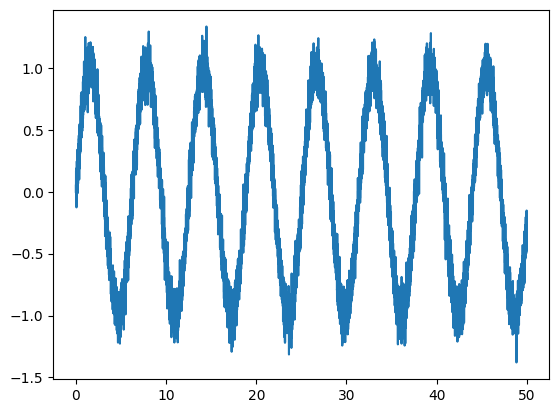

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
import matplotlib.pyplot as plt

# シードの固定（再現性のため）
np.random.seed(42)
tf.random.set_seed(42)

# 1. ダミーの時系列データの作成 -----------------------------------------
# 例: (サンプル数, 時系列の長さ, 特徴量)
num_samples = 1000
timesteps = 10
features = 1

# 適当に正弦波にノイズを加えた時系列を作成
x = np.linspace(0, 50, num_samples * timesteps)
data = np.sin(x)
data = data + np.random.normal(scale=0.1, size=data.shape)
print(data)
print(data.shape)


data2 = data.reshape(num_samples, timesteps, features)
print("-----data2------")
print(data2)
print(data2.shape)
plt.plot(x,data)
plt.show()